In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
data = {
    "Day": pd.date_range(start="2026-01-01", periods=20, freq="D"),
    "Value": np.random.randint(50, 100, size=20)
}

df = pd.DataFrame(data)
df.set_index("Day", inplace=True)

print(df)

            Value
Day              
2026-01-01     66
2026-01-02     85
2026-01-03     99
2026-01-04     89
2026-01-05     53
2026-01-06     51
2026-01-07     55
2026-01-08     91
2026-01-09     53
2026-01-10     78
2026-01-11     67
2026-01-12     75
2026-01-13     93
2026-01-14     83
2026-01-15     59
2026-01-16     85
2026-01-17     63
2026-01-18     80
2026-01-19     97
2026-01-20     64


In [30]:
df["ewma"] = df["Value"].ewm(alpha=0.1,adjust=False).mean()
df["ewma_0.5"] = df["Value"].ewm(alpha=0.5,adjust=False).mean()
df["ewma_0.9"] = df["Value"].ewm(alpha=0.9,adjust=False).mean()
df["ewma_0.10"] = df["Value"].ewm(alpha=0.10,adjust=False).mean()

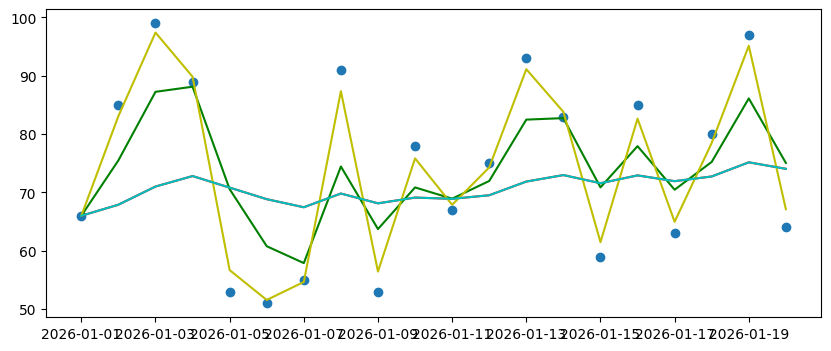

In [35]:
plt.figure(figsize=(10,4))
plt.scatter(df.index, df["Value"])
plt.plot(df["ewma"],color="r")
plt.plot(df["ewma_0.5"],color="g")
plt.plot(df["ewma_0.9"],color="y")
plt.plot(df["ewma_0.10"],color="c")
plt.show()

In [39]:
def ewma(series, alpha):
  results = []
  v = series.iloc[0]
  results.append(v)
  for i in range(1, len(series)):
    v = alpha*series.iloc[i] + (1-alpha)*v
    results.append(v)
  return results

In [41]:
df["ewma_me"] = ewma(df["Value"],alpha=0.1)

In [42]:
df.head()

,Value,ewma,ewma_0.5,ewma_0.9,ewma_0.10,ewma_me
Day,,,,,,
2026-01-01,66,66.0000,66.0000,66.0000,66.0000,66.0000
2026-01-02,85,67.9000,75.5000,83.1000,67.9000,67.9000
2026-01-03,99,71.0100,87.2500,97.4100,71.0100,71.0100
2026-01-04,89,72.8090,88.1250,89.8410,72.8090,72.8090
2026-01-05,53,70.8281,70.5625,56.6841,70.8281,70.8281
